# Reading CSS Data with Python

Reading CSS data relies on the ObsPy library: https://docs.obspy.org/index.html

If not installed in your environment you might do so by using: 

Pip: pip install obspy

or 

Conda: conda install -c obspy obspy

In [3]:
import obspy
import os

In [4]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [7]:
!ls /home/andbro/kilauea-data/BSPF/data/strain

 275.wfdisc   pfoo1-2022275-p1s32.w  'Screen Shot 2023-10-19 at 2.21.20 PM.png'


In [26]:
datapath = data_path+"BSPF/data/strain/"
filename = "275.wfdisc"

## read data stream using obspy routine
st = obspy.read(datapath+filename, format="CSS")

## merge traces that might be split due to data gaps or overlaps
st.merge()

## setting the calibration variable if not already set
for tr in st:
    if tr.stats.calib == 0:
        tr.stats.calib = 1.0

## show all traces in data stream
st

ValueError: invalid literal for int() with base 10: b''

In [17]:
st.plot(equal_scale=False);

NameError: name 'st' is not defined

## To cut the data use:

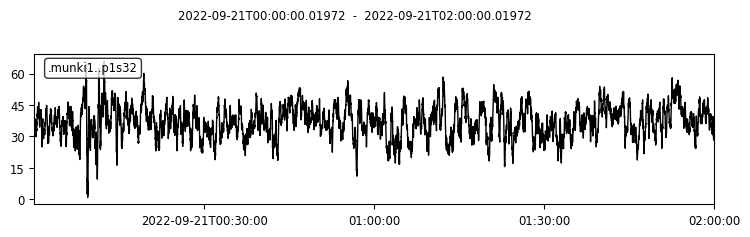

In [7]:
starttime = obspy.UTCDateTime("2022-09-21 00:00:00")
endtime   = obspy.UTCDateTime("2022-09-21 02:00:00")

st.trim(starttime, endtime)

st.plot(equal_scale=False);

If unfamiliar with stream objects see: 
    https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html

## Extract Data: 

To get data as an array use:

In [5]:
data = st[0].data
data

array([ 33.845352,  33.923008,  34.0145  , ...,  33.578384,  33.751537,
        33.918514], dtype=float32)

To get the time (as relative total seconds) as a n array use:

In [6]:
time = st[0].times()
time

array([  0.00000000e+00,   5.00000000e-02,   1.00000000e-01, ...,
         7.19990000e+03,   7.19995000e+03,   7.20000000e+03])